# Transformación de imagen 

In [14]:
#Importación de los módulos necesarios para la transformación

from torchvision.transforms import functional as F
from PIL import Image
import torch

# Cargando la imagen 
img = Image.open('C:/Users/ornel/OneDrive/Escritorio/gatito.jpg')

# Convirtiendo la imagen a un tensor en Pytorch 
img_tensor = F.to_tensor(img)


# Se aplicarán las transformaciones variadas

In [15]:
#AJUSTAR EL BRILLO A LA IMAGEN 

brightness_adjusted_img = F.adjust_brightness(img_tensor, brightness_factor=0.5)


In [16]:
#AJUSTAR EL CONSTRASTE A LA IMAGEN 

contrast_adjusted_img = F.adjust_contrast(img_tensor, contrast_factor=1.5)


In [17]:
#APLICAR CORRECCIÓN GAMA A LA IMAGEN 

gamma_adjusted_img = F.adjust_gamma(img_tensor, gamma=1.2)


In [18]:
#AJUSTAR EL TONO DE LA IMAGEN 

hue_adjusted_img = F.adjust_hue(img_tensor, hue_factor=0.1)


In [19]:
#AJUSTAR LA SATURACIÓN DEL COLOR DE LA IMAGEN 

saturation_adjusted_img = F.adjust_saturation(img_tensor, saturation_factor=1.5)


In [20]:
#AJUSTAR LA NITIDEZ DE LA IMAGEN 

sharpness_adjusted_img = F.adjust_sharpness(img_tensor, sharpness_factor=2.0)


# Mostrar las imágenes transformadas vs imagen original 

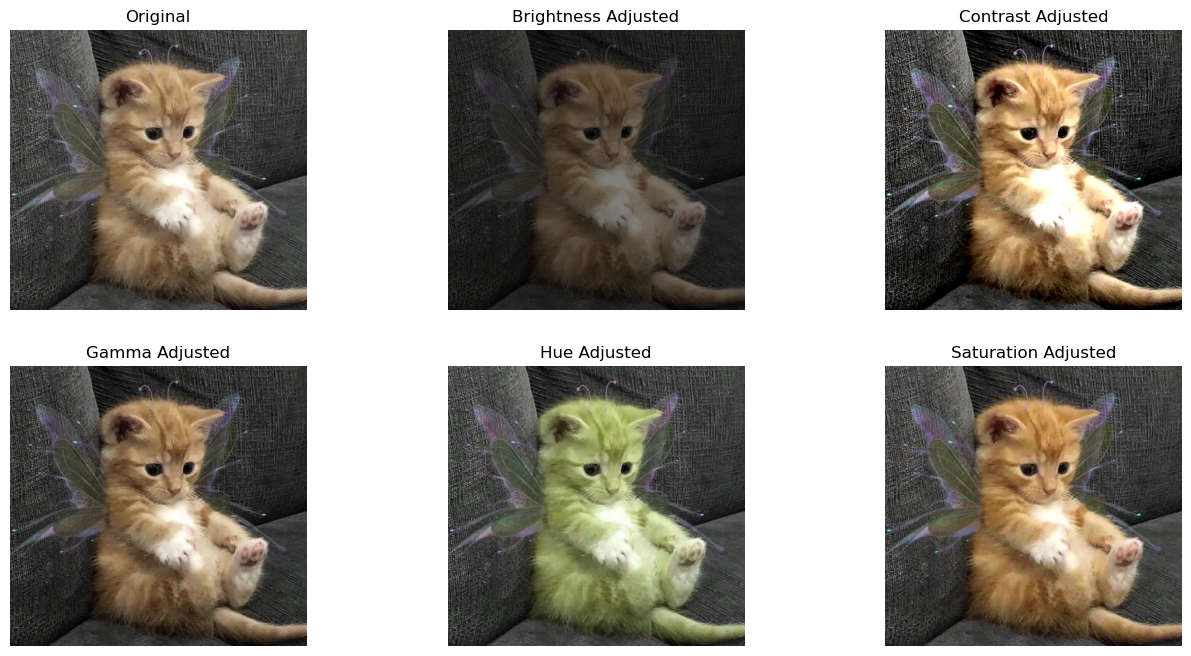

In [26]:
import matplotlib.pyplot as plt

# Convertir las imágenes transformadas de nuevo a PIL Image
brightness_adjusted_img_pil = F.to_pil_image(brightness_adjusted_img)
contrast_adjusted_img_pil = F.to_pil_image(contrast_adjusted_img)
gamma_adjusted_img_pil = F.to_pil_image(gamma_adjusted_img)
hue_adjusted_img_pil = F.to_pil_image(hue_adjusted_img)
saturation_adjusted_img_pil = F.to_pil_image(saturation_adjusted_img)
sharpness_adjusted_img_pil = F.to_pil_image(sharpness_adjusted_img)

# Crear una lista con todas las imágenes transformadas y la imagen original
images = [img, brightness_adjusted_img_pil, contrast_adjusted_img_pil, gamma_adjusted_img_pil, hue_adjusted_img_pil, saturation_adjusted_img_pil, sharpness_adjusted_img_pil]
titles = ['Original', 'Brightness Adjusted', 'Contrast Adjusted', 'Gamma Adjusted', 'Hue Adjusted', 'Saturation Adjusted', 'Sharpness Adjusted']

# Mostrar todas las imágenes en una cuadrícula
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(titles[i])

plt.show()






# Exploración de la red CNN 

In [27]:
#Cargando el conjunto de datos CIFAR, donde se trasnforman las imágenes a tensores y luego se normalizarán

import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Transformaciones
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Cargar el conjunto de datos
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [00:20<00:00, 8513243.75it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [28]:
#Creación del DataLoader para los datos 

from torch.utils.data import DataLoader

# Cargar los datos en el DataLoader
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)


In [29]:
#Probando diferentes versiones del modelo cnn_model para ver cómo se ve afectado el tamaño d ela salida

import torch.nn as nn

# Modelo inicial
cnn_model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=0),
    nn.MaxPool2d(kernel_size=2, stride=2)
)

# Prueba diferentes versiones del modelo

for images, labels in trainloader:
    print('Input shape:', images.shape)
    out = cnn_model(images)
    print('Output shape:', out.shape)
    break


Input shape: torch.Size([32, 3, 32, 32])
Output shape: torch.Size([32, 12, 15, 15])


# Probando diferentes variaciones del modelo CNN

In [30]:
#Capa CNN con padding=0 y padding=1

nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=0)
nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)




Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

ANÁLISIS DE LA SALIDA: 

*En la primera capa convolucional con padding=0, la dimensión de la salida será menor que la dimensión de entrada debido a la aplicación de la convolución sin agregar ningún relleno. La fórmula para calcular la dimensión de la salida es (W - F + 2P)/S + 1, donde W es la dimensión de la entrada, F es el tamaño del kernel, P es el tamaño de padding y S es el stride. En este caso, como no se agrega padding, la fórmula se reduce a (W - F)/S + 1.

*En la segunda capa convolucional con padding=1, la dimensión de la salida será igual que la dimensión de entrada debido a la aplicación de la convolución con padding de tamaño 1 en cada lado. Esto ayuda a preservar el tamaño de la imagen de entrada. La fórmula para calcular la dimensión de la salida es (W - F + 2P)/S + 1, donde W es la dimensión de la entrada, F es el tamaño del kernel, P es el tamaño de padding y S es el stride. En este caso, como se agrega un padding de tamaño 1, la fórmula se reduce a (W - F + 2)/S + 1.

In [31]:
#Una capa convolucional con stride = 1 y stride = 2

nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=0)
nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=2, padding=0)

Conv2d(3, 12, kernel_size=(3, 3), stride=(2, 2))

ANÁLISIS DE LA SALIDA: 

*En la primera capa convolucional con stride=1, la dimensión de la salida será igual que la dimensión de entrada. Esto se debe a que el stride de 1 significa que el filtro se desplaza una posición a la vez en todas las direcciones.

*En la segunda capa convolucional con stride=2, la dimensión de la salida será la mitad de la dimensión de entrada en cada dirección. Esto se debe a que el filtro se desplaza dos posiciones a la vez en todas las direcciones.

In [32]:
# Un kernel_size = 3 y kernel_size = 5

nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=0)
nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=0)

Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))

ANÁLISIS DE LA SALIDA: 

*En la primera capa convolucional con kernel_size=3, la dimensión de la salida será ligeramente menor que la dimensión de entrada. Esto se debe a que se aplica una convolución con un filtro de tamaño 3x3. La fórmula para calcular la dimensión de la salida es (W - F)/S + 1, donde W es la dimensión de la entrada, F es el tamaño del kernel y S es el stride. En este caso, como el kernel tiene un tamaño de 3x3, la fórmula se reduce a (W - 3)/S + 1.

*En la segunda capa convolucional con kernel_size=5, la dimensión de la salida será significativamente menor que la dimensión de entrada. Esto se debe a que se aplica una convolución con un filtro de tamaño 5x5. La fórmula para calcular la dimensión de la salida es (W - F)/S + 1, donde W es la dimensión de la entrada, F es el tamaño del kernel y S es el stride. En este caso, como el kernel tiene un tamaño de 5x5, la fórmula se reduce a (W - 5)/S + 1.

In [36]:
# Una capa convolucional seguida de una capa de pooling con kernel_size = 2 y stride = 2

nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=0)
nn.MaxPool2d(kernel_size=2, stride=2)


MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

ANÁLISIS DE LA SALIDA: 
    
La dimensión de la salida será la mitad de la dimensión de entrada en cada dirección. Esto se debe a que el pooling se aplica con un kernel de tamaño 2x2 y un stride de 2, lo que significa que se toma el máximo valor dentro de cada ventana de 2x2 y se desplaza dos posiciones a la vez.   

In [37]:
#Una capa convolucional con kernel_size = 4 y stride = 4

nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=0)
nn.MaxPool2d(kernel_size=4, stride=4)

MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)

ANÁLISIS DE LA SALIDA: 

La dimensión de la salida será la cuarta parte de la dimensión de entrada en cada dirección. Esto se debe a que el pooling se aplica con un kernel de tamaño 4x4 y un stride de 4, lo que significa que se toma el máximo valor dentro de cada ventana de 4x4 y se desplaza cuatro posiciones a la vez.

# Cuestionario

### ¿Qué significa cada dimensión en la salida?

En la salida de la red convolucional, cada dimensión representa lo siguiente:

*Dimensión definición:
Es la dimensión correspondiente a la definición de la imagen, es decir, el número de canales de la imagen.
Por ejemplo, si la imagen es en color RGB, esta dimensión será 3.
*Dimensión número de filtros: 
Es la dimensión correspondiente al número de filtros convolucionales que se aplicaron en la capa convolucional.
Cada filtro produce una característica específica en la salida.
*Dimensión número de ejemplos de datos:
Es la dimensión correspondiente al número de ejemplos de datos de entrada que se procesaron en la red convolucional.
En un lote de entrenamiento, esta dimensión representa el tamaño del lote.

### ¿Cómo afecta una capa de pooling al tamaño de la salida?

Una capa de pooling reduce el tamaño de la salida. Esto se debe a que la operación de pooling reduce el tamaño de la imagen al seleccionar el valor máximo o promedio en una región determinada. Por lo tanto, la salida de una capa de pooling tiene una dimensión más pequeña en comparación con la entrada.

### ¿Cómo afectan los parámetros de padding y stride al tamaño de la salida? 

*El parámetro de padding afecta al tamaño de la salida de la siguiente manera:

Si el padding es igual a 0, la salida será más pequeña que la entrada debido a que no se añade ningún píxel adicional alrededor de la imagen durante la operación de convolución.
Si el padding es mayor que 0, se añaden píxeles adicionales alrededor de la imagen antes de aplicar la operación de convolución. Esto hace que la salida sea más grande que la entrada.

*El parámetro de stride afecta al tamaño de la salida de la siguiente manera:

Si el stride es igual a 1, la salida tendrá el mismo tamaño que la entrada.
Si el stride es mayor que 1, la salida será más pequeña que la entrada debido a que se aplica una submuestreo al saltarse píxeles durante la operación de convolución.

### ¿Cómo afecta el tamaño de filtro/núcleo al tamaño de la salida?

*Un filtro con un tamaño de kernel más pequeño producirá una salida con una resolución mayor, ya que se centra en detalles más finos de la imagen.
*Un filtro con un tamaño de kernel más grande producirá una salida con una resolución más baja, ya que se centra en características más grandes de la imagen.